In [84]:
import pymongo
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objects as go
from bson.objectid import ObjectId
import pprint
import numpy as np

## Establish Connection to MongoDB Server on AWS

In [85]:
def create_mongo_connection(IP_ADDRESS='3.122.195.49', DATABASE='tKGR', USER='peng', PASSWORD='siemens'):
    client = pymongo.MongoClient("mongodb://{}:{}@{}/{}".format(USER, PASSWORD, IP_ADDRESS, DATABASE))
    db = getattr(client, DATABASE)
    print("Connection to {}/{} established".format(IP_ADDRESS, DATABASE))
    return db

In [86]:
db = create_mongo_connection(IP_ADDRESS='3.122.195.49')
col = db['analysis_checkpoints_2020_8_12_7_52_53']

Connection to 3.122.195.49/tKGR established


In [87]:
import datetime 
def hours2date(hours, start_format_str='2014-01-01'):
    start = datetime.datetime.strptime(start_format_str, "%Y-%m-%d")
    d = datetime.timedelta(days = hours//24)
    a = start + d
    return a.strftime("%Y-%m-%d")

In [76]:
hours2date(89280)

'2024-03-09'

## Iterator of analysis on each query

In [ ]:
exp = col.find({"epoch":0, "batch_idx":50})

## Show all selected nodes and edges in one plot

5f33a067d7223112c7d8b7e4


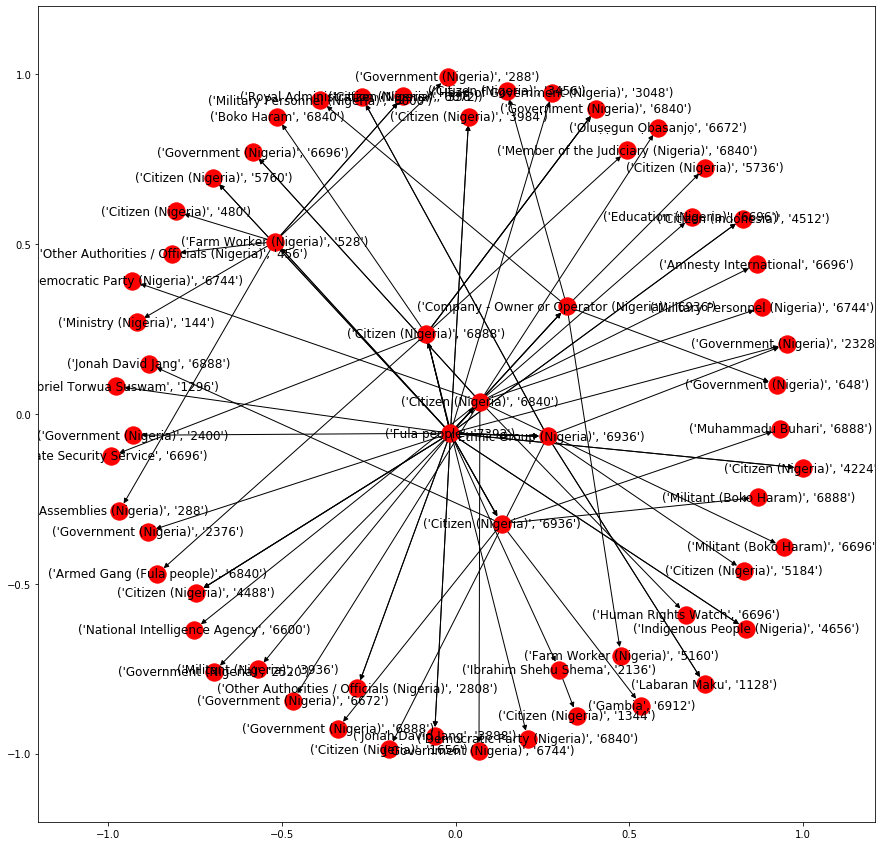

In [90]:
ex = next(exp)
G = nx.MultiDiGraph()
print(ex['_id'])
for i in range(3):
    nodes = [tuple(node) for node in ex[str(i)]['source_nodes(semantics)']]
    G.add_nodes_from(nodes)
    for j, node in enumerate(nodes):
        G.node[node]['node_score'] = ex[str(i)]['source_nodes_score'][j]
    G.add_edges_from([((edge[0], edge[1]), (edge[2], edge[3]), dict(rel=edge[4])) 
                      for edge in ex[str(i)]['selected_edges(semantics)']])
fig, ax = plt.subplots(figsize=(15,15))
nx.draw_networkx(G, with_label=True, ax=ax)
plt.show()

5f204a90140f0b205334dba2

In [91]:
print("Query: {}, {}, ?, at {}".format(ex['subject(semantic)'], ex['relation(semantic)'], ex['timestamp']))
gt = ex['object(semantic)']
print("? = {}".format(ex['object(semantic)']))

Query: Fula people, Abduct, hijack, or take hostage, ?, at 7392
? = Citizen (Nigeria)


In [93]:
# print("rank: {}".format(ex['prediction_rank']))
print(ex['entity_candidate(semantics)'])
print(ex['entity_score'])

['Citizen (Indonesia)', 'Citizen (Nigeria)', 'Government (Nigeria)', 'Other Authorities / Officials (Nigeria)', 'Military Personnel (Nigeria)', 'Jonah David Jang', 'Militant (Boko Haram)', 'Ministry (Nigeria)', 'Assemblies (Nigeria)', 'Royal Administration (Nigeria)', 'Fula people', 'Labaran Maku', 'Head of Government (Nigeria)', 'Farm Worker (Nigeria)', 'Gambia', 'Company - Owner or Operator (Nigeria)', 'Muhammadu Buhari', 'Ethnic Group (Nigeria)']
[0.010856583714485168, 0.29738152027130127, 0.049846965819597244, 0.19593030214309692, 0.0022982957307249308, 0.02012939564883709, 0.0020751291885972023, 0.009308543056249619, 0.005202937871217728, 0.0025947464164346457, 0.009340373799204826, 0.004010104574263096, 0.018237026408314705, 0.0026391209103167057, 0.0016652668127790093, 0.05345938354730606, 0.0031562121585011482, 0.04513208195567131]


In [94]:
cmap = matplotlib.cm.get_cmap('YlGnBu')
node_color = cmap(0.3)
gt_color = matplotlib.cm.get_cmap('Reds')(0.8)

In [95]:
rotation = 10
rotation = rotation/180*3.1415

time_max = max([max([int(_[1]) for _ in ex[str(i)]['source_nodes(semantics)']]) for i in range(3)])
time_min = min([min([int(_[1]) for _ in ex[str(i)]['source_nodes(semantics)']]) for i in range(3)])

node_list = []
edge_list = []
G = nx.MultiDiGraph()

for i in range(3):
    edges = [((edge[0], edge[1]), (edge[2], edge[3]), dict(rel=edge[4], step=i)) 
                      for edge in ex[str(i)]['selected_edges(semantics)']]
    
    G.add_edges_from(edges)

    for j, node in enumerate(ex[str(i)]['new_source_nodes(semantics)']):
        G.node[tuple(node)]['node_score'] = ex[str(i)]['new_source_nodes_score'][j]
        G.node[tuple(node)]['time_pos'] = 2*(int(node[1])-time_min)/(time_max-time_min) - 1
        
    node_list.append(list(G.nodes))
    edge_list.append(list(G.edges))

In [97]:
edge_attn_list = []
edge_attn_list.append(ex["0"]["selected_edges_attention"][0])
edge_attn_list.append(ex["1"]["selected_edges_attention"][0])
edge_attn_list.append(ex["2"]["selected_edges_attention"][0])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


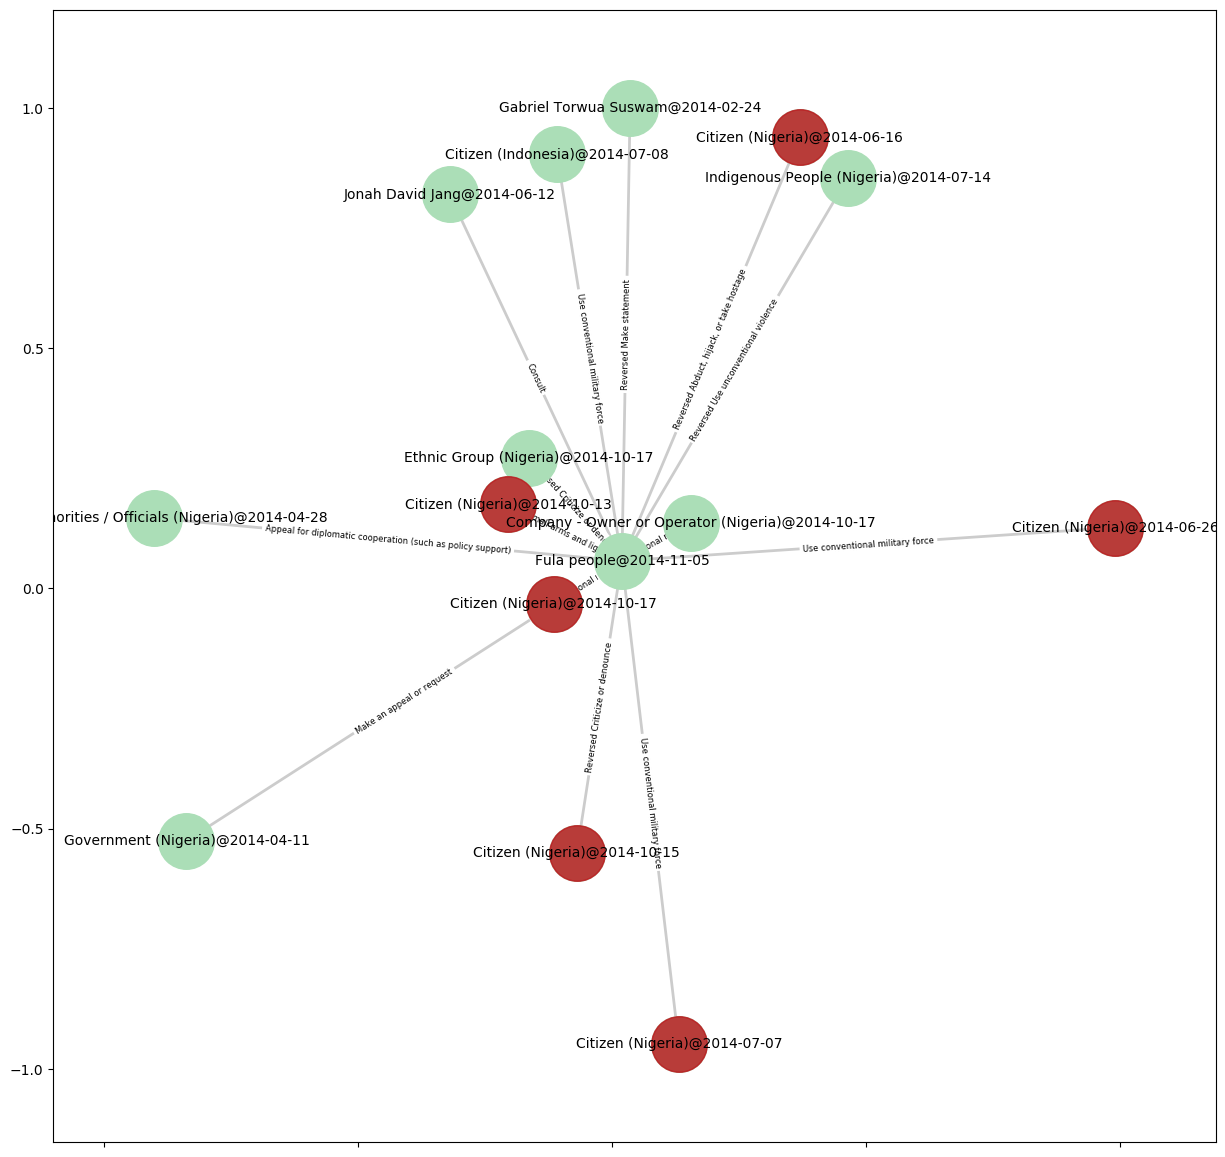

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


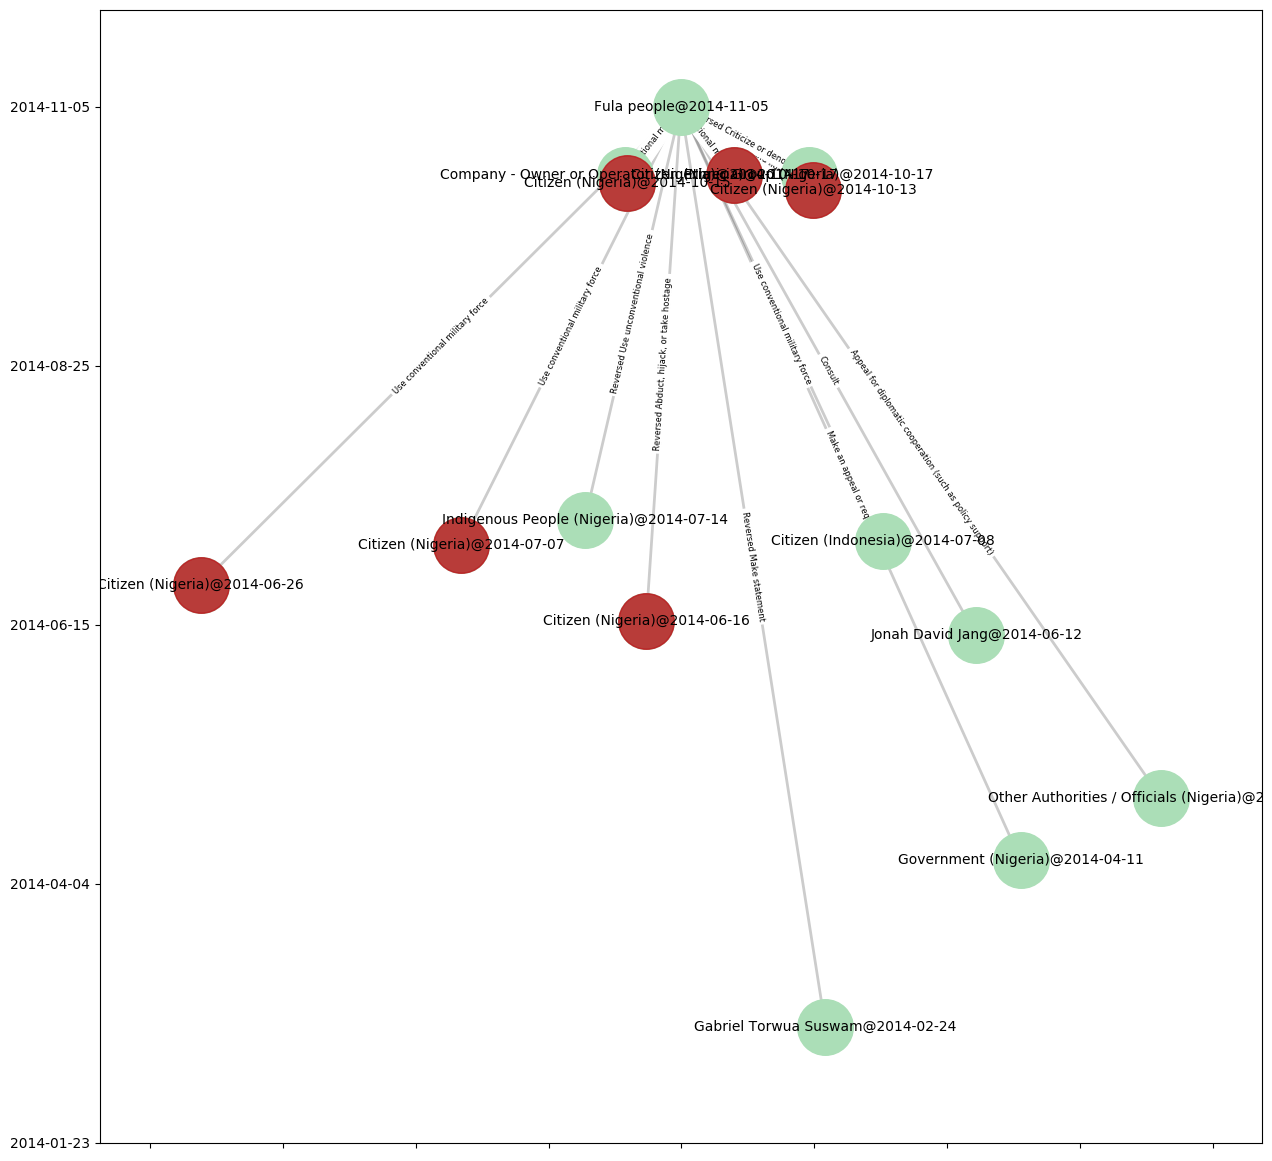

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


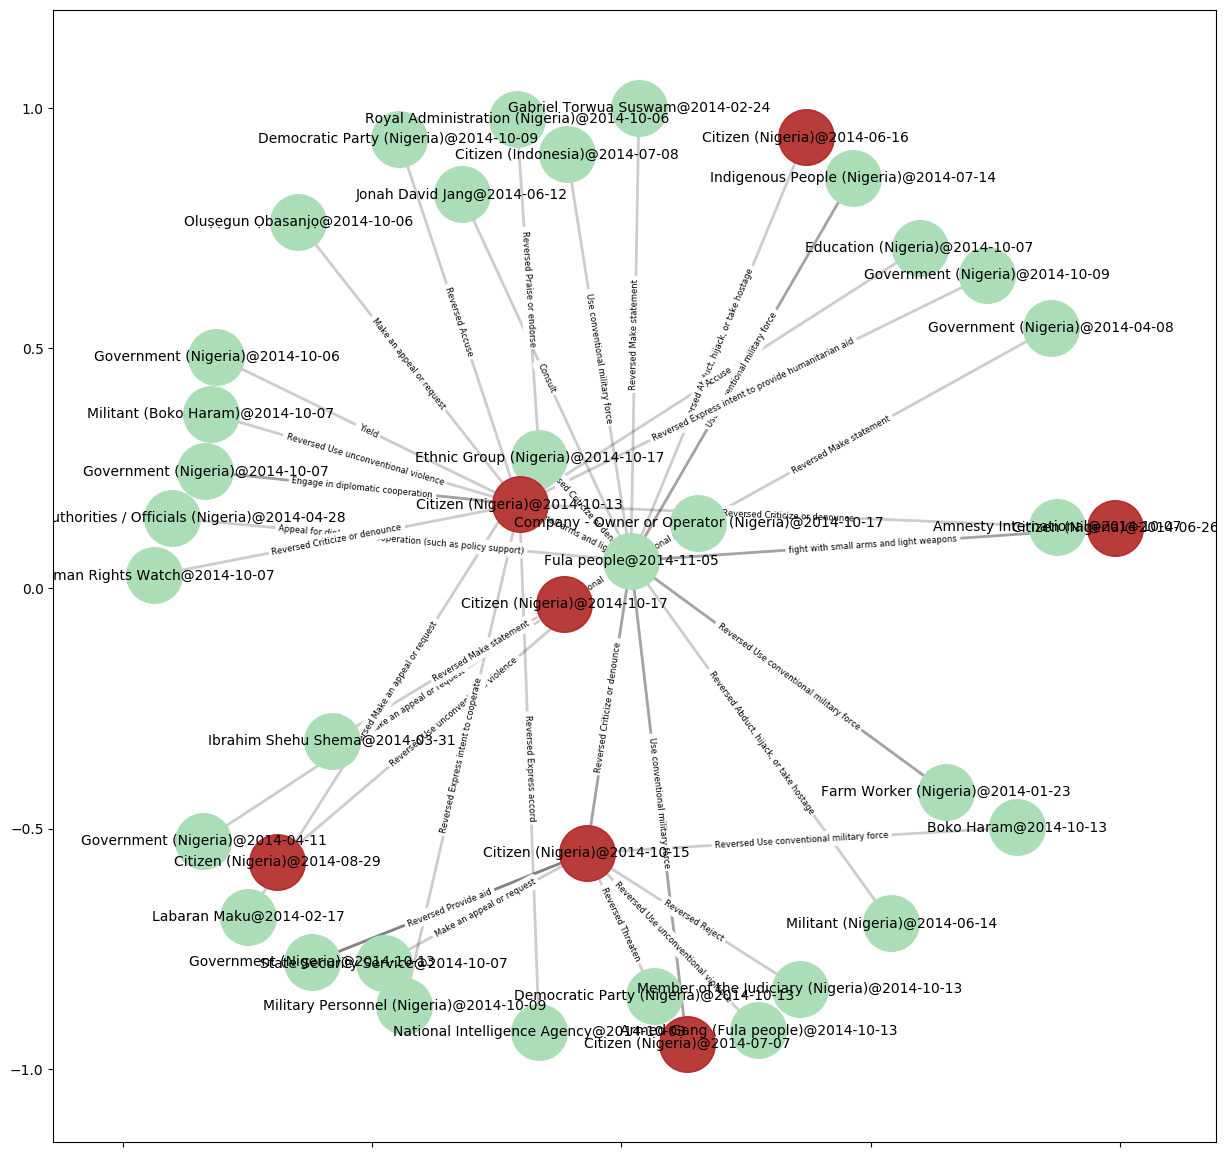

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


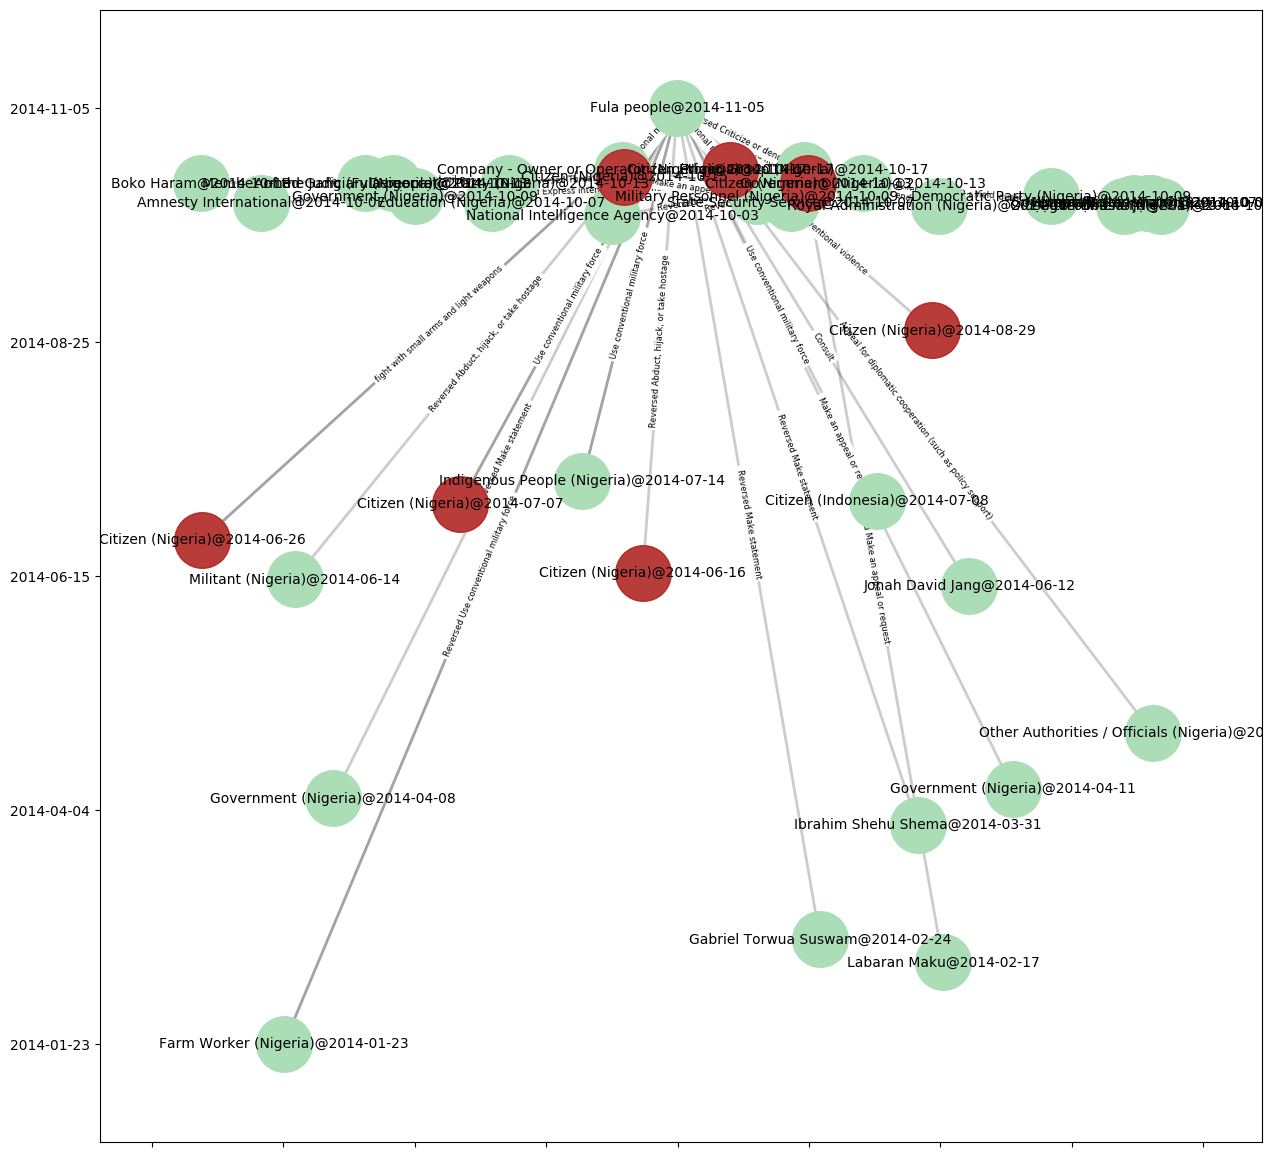

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


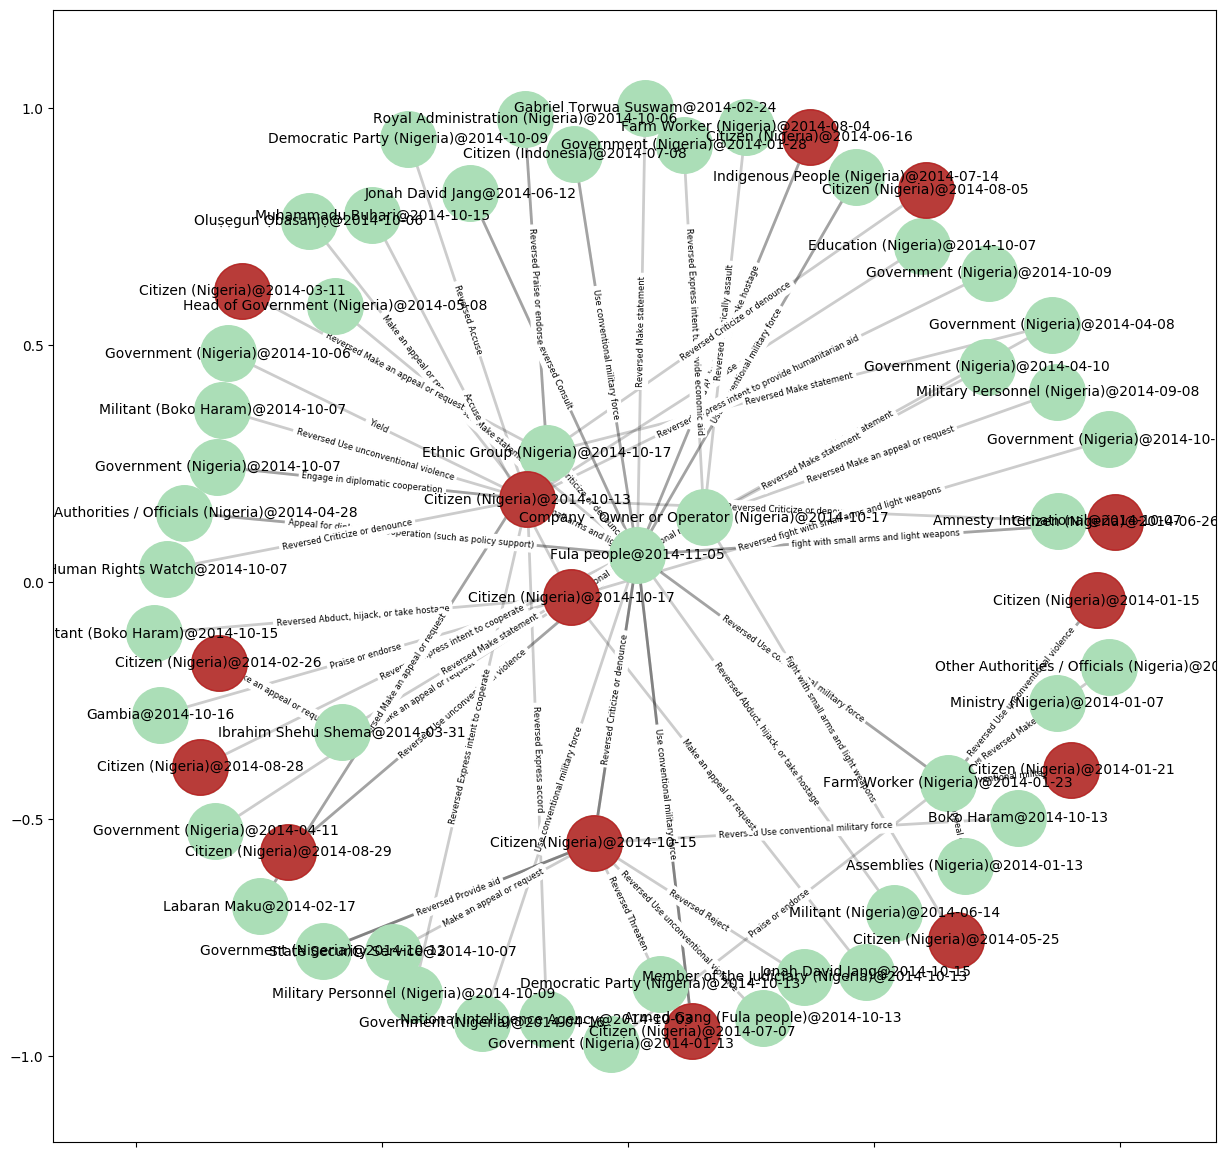

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


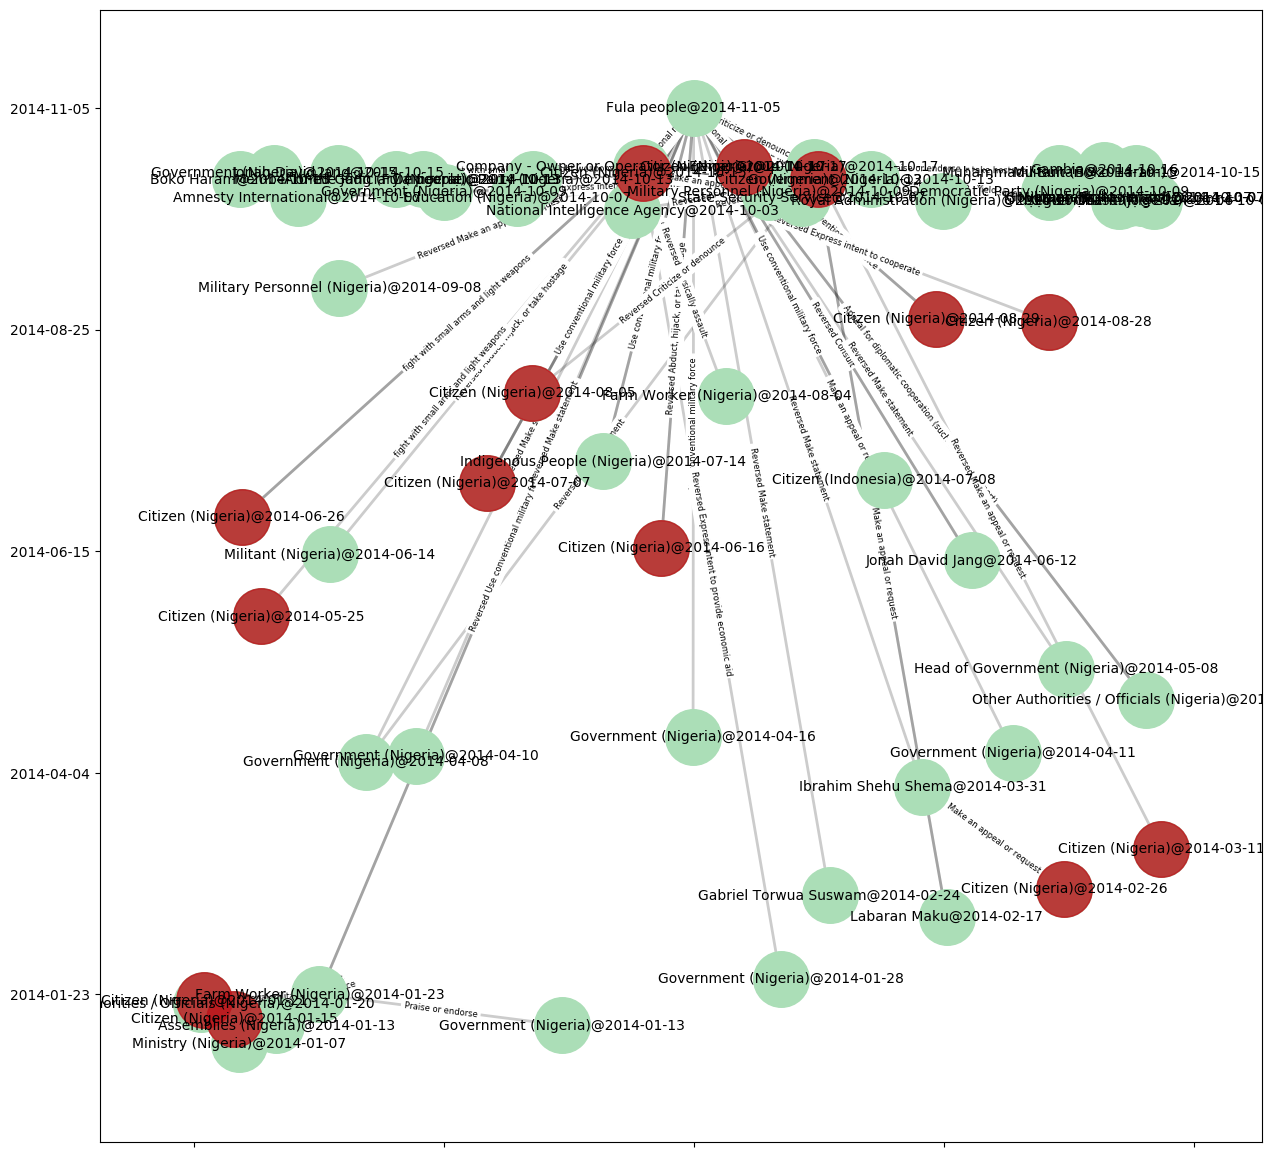

In [98]:
pos = nx.spring_layout(G, k=4/np.sqrt(len(G.nodes)))

for i in range(3):
    fig, ax = plt.subplots(figsize=(15,15), dpi=100)
    nx.draw_networkx_nodes(G, pos, nodelist=node_list[i], node_color=node_color, alpha=1, node_size=1600, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=edge_list[i], width=2, alpha=0.2,ax=ax)
    nx.draw_networkx_labels(G, pos, {node: '@'.join([node[0], hours2date(int(node[1]))]) for node in node_list[i]}, font_size=10, ax=ax)
    edge_labels={(k[0], k[1]):v for k, v in nx.get_edge_attributes(G, 'rel').items() if k in edge_list[i]}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)
    
    # ground truth
    ground_truth = [node for node in node_list[i] if node[0]==gt]
    nx.draw_networkx_nodes(G, pos, nodelist=ground_truth, node_color=gt_color, alpha=0.8, node_size=1600,ax=ax)
    ax.set_xticklabels([])
    plt.show()

    node_label_pos = {}
    rotation = 60
    node_labels =  nx.get_node_attributes(G, 'time_pos') 
    for n1 in node_list[i]:
        v = pos[n1]
        v0 = np.cos(rotation)*v[0] - np.sin(rotation)*v[1]
        v1 = node_labels[n1]
        node_label_pos[n1] = [v0,v1]
        

    fig, ax = plt.subplots(figsize=(15,15), dpi=100)
    nx.draw_networkx_nodes(G, node_label_pos, nodelist=node_list[i], node_color=node_color, alpha=1, node_size=1600, ax=ax)
    nx.draw_networkx_edges(G, node_label_pos, edgelist=edge_list[i], width=2, alpha=0.2,ax=ax)
    nx.draw_networkx_labels(G, node_label_pos, {node: '@'.join([node[0], hours2date(int(node[1]))]) for node in node_list[i]}, font_size=10, ax=ax)
    edge_labels={(k[0], k[1]):v for k, v in nx.get_edge_attributes(G, 'rel').items() if k in edge_list[i]}
    nx.draw_networkx_edge_labels(G, node_label_pos, edge_labels=edge_labels, font_size=6)
    nx.draw_networkx_nodes(G, node_label_pos, nodelist=ground_truth, node_color=gt_color, alpha=0.8, node_size=1600,ax=ax)
    plt.yticks(np.linspace(-1,1,5), list(map(hours2date, np.linspace(time_min, time_max, 5))))
    ax.set_xticklabels([])
    plt.show()